# **Building a Classification Model for The Water Quality Data Set**

## **1. Exploratory Data Analysis (EDA)**

### **1.1 Importing Libraries**

In [806]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set matplotlib.pyplot style to dark background
plt.style.use('dark_background')

### **1.2 Importing Dataset**
* **Data Source :** https://www.kaggle.com/datasets/adityakadiwal/water-potability/data 
* **Content :** The water_potability.csv file contains water quality metrics for 3276 different water bodies.
* **Target :** Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

In [738]:
path = "water_potability.csv"
df = pd.read_csv(path)
df.sample(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
2250,6.975392,205.940246,22685.684440,5.927759,304.049074,441.765158,13.518052,77.979400,4.931460,0
3215,5.608623,271.882219,43680.222521,4.157335,366.866533,450.896053,16.442753,61.249762,3.777508,1
1709,8.040188,201.809216,11861.550852,7.200310,300.398435,420.549219,7.168607,90.761776,3.221139,0
2634,7.399811,229.776265,28630.954416,8.711706,302.315759,437.366909,11.927552,78.576441,3.803724,0
2273,7.393978,209.619214,17939.704696,7.233736,NaN,349.209623,13.579349,68.152467,3.782728,0


### **1.3 Visualizing the Dataset**

In [739]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [740]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


<Axes: title={'center': 'Original Dataset Target Count'}, xlabel='Potability'>

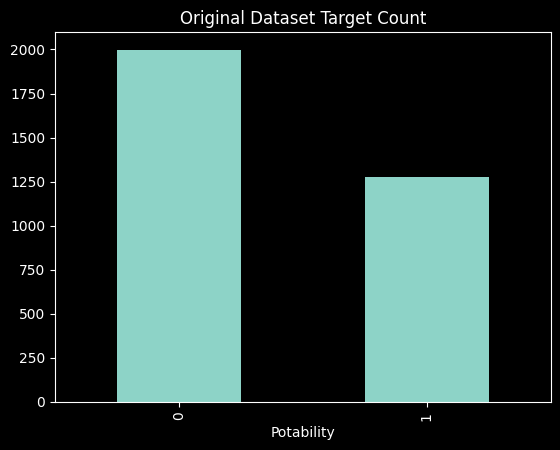

In [741]:
df['Potability'].value_counts().plot(title = 'Original Dataset Target Count',kind = 'bar')

In [742]:
cols = df.columns[:-1].tolist()
cols

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

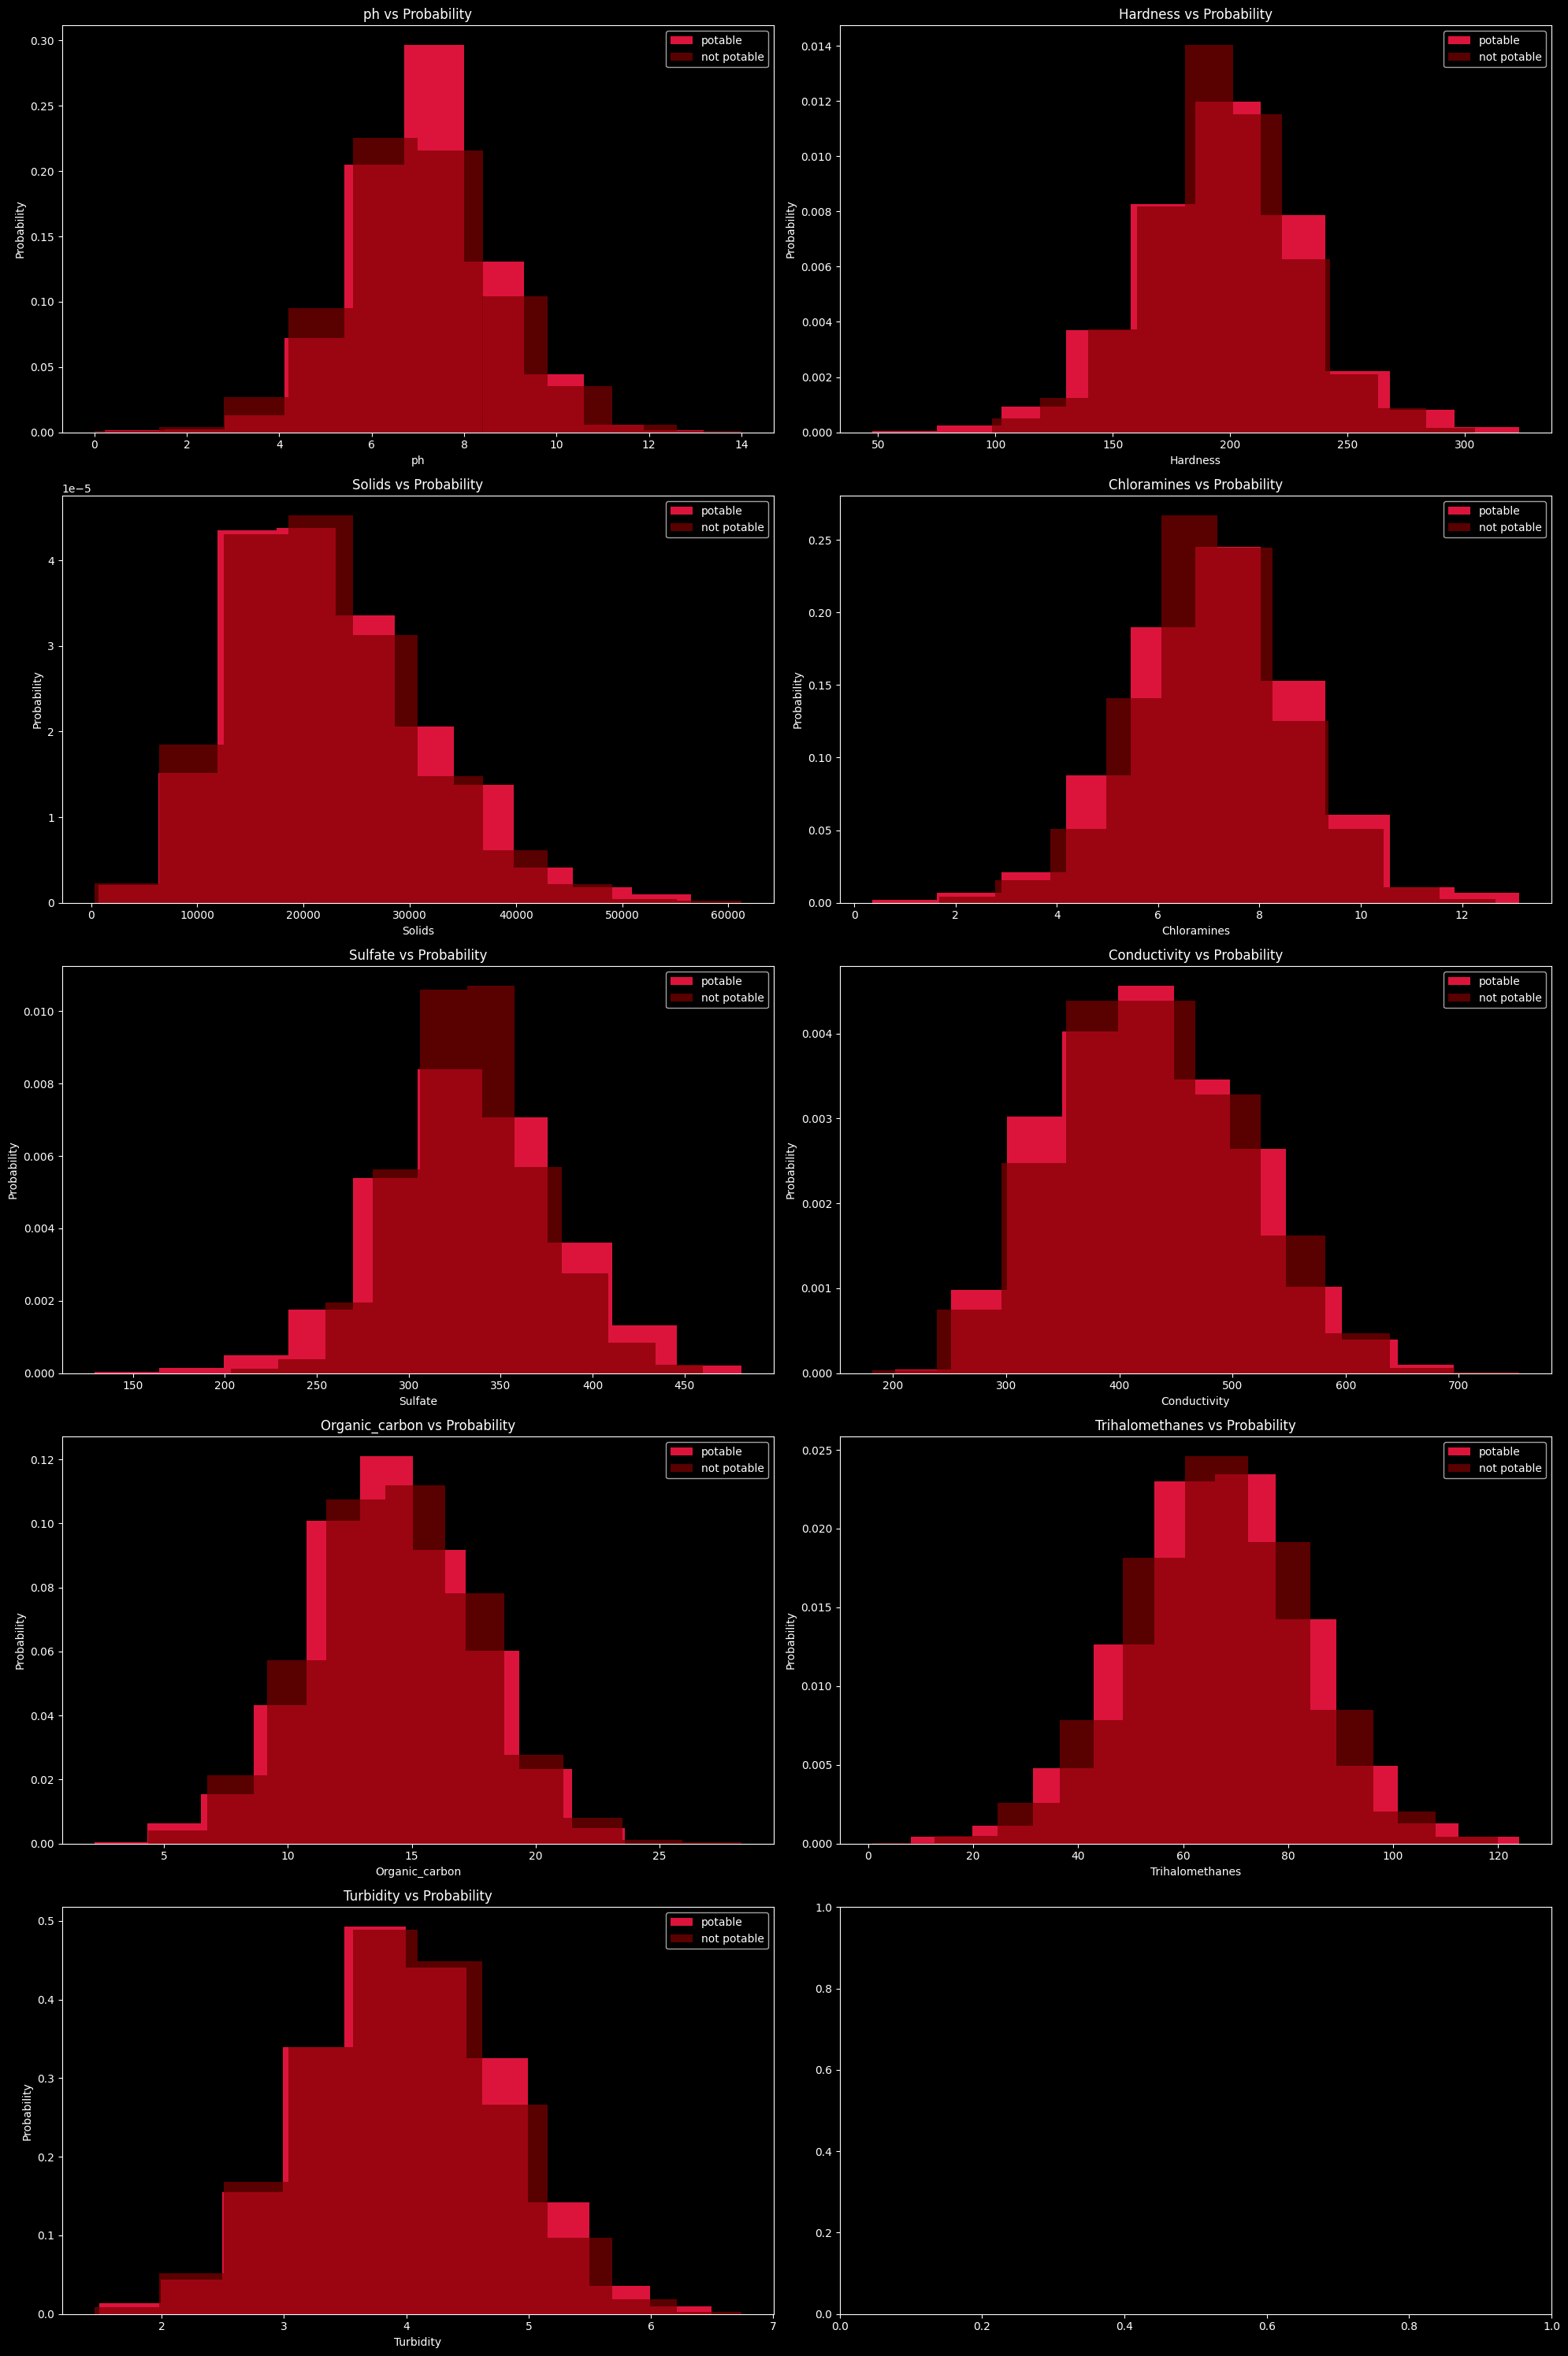

In [743]:
df_potable  = df[df['Potability'] == 1]
df_not_potable = df[df['Potability'] == 0]
col_no = 0

# Create a figure with 5 rows and 2 columns of subplots
fig, axs = plt.subplots(5, 2, figsize=(20, 30))

# for every label except "Potability", we plot the graph
for i in range(5):
  for j in range(2):
    if col_no <= 8:
        axs[i][j].hist(df_potable[cols[col_no]], color = "crimson", label = "potable", alpha = 1, density = True)
        axs[i][j].hist(df_not_potable[cols[col_no]], color = "maroon", label = "not potable", alpha = 0.7, density = True)
        axs[i][j].set_title(cols[col_no]+" vs Probability")
        axs[i][j].set_ylabel("Probability")
        axs[i][j].set_xlabel(cols[col_no])
        axs[i][j].legend()
        col_no = col_no + 1
      
# Adjust layout to prevent overlap
plt.tight_layout()

# Display the figure
plt.show()

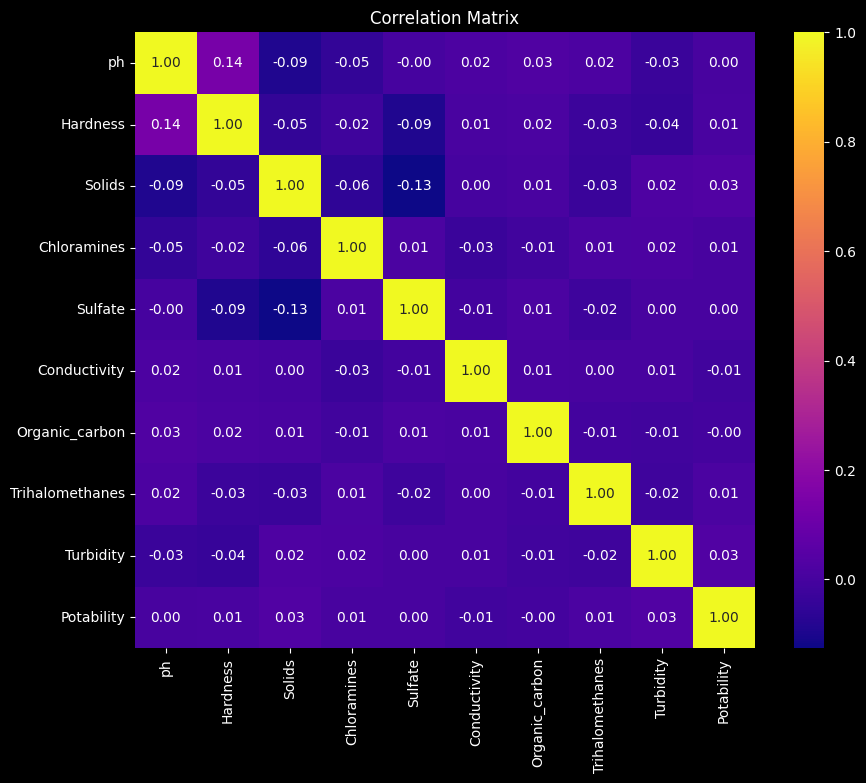

In [808]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='plasma', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

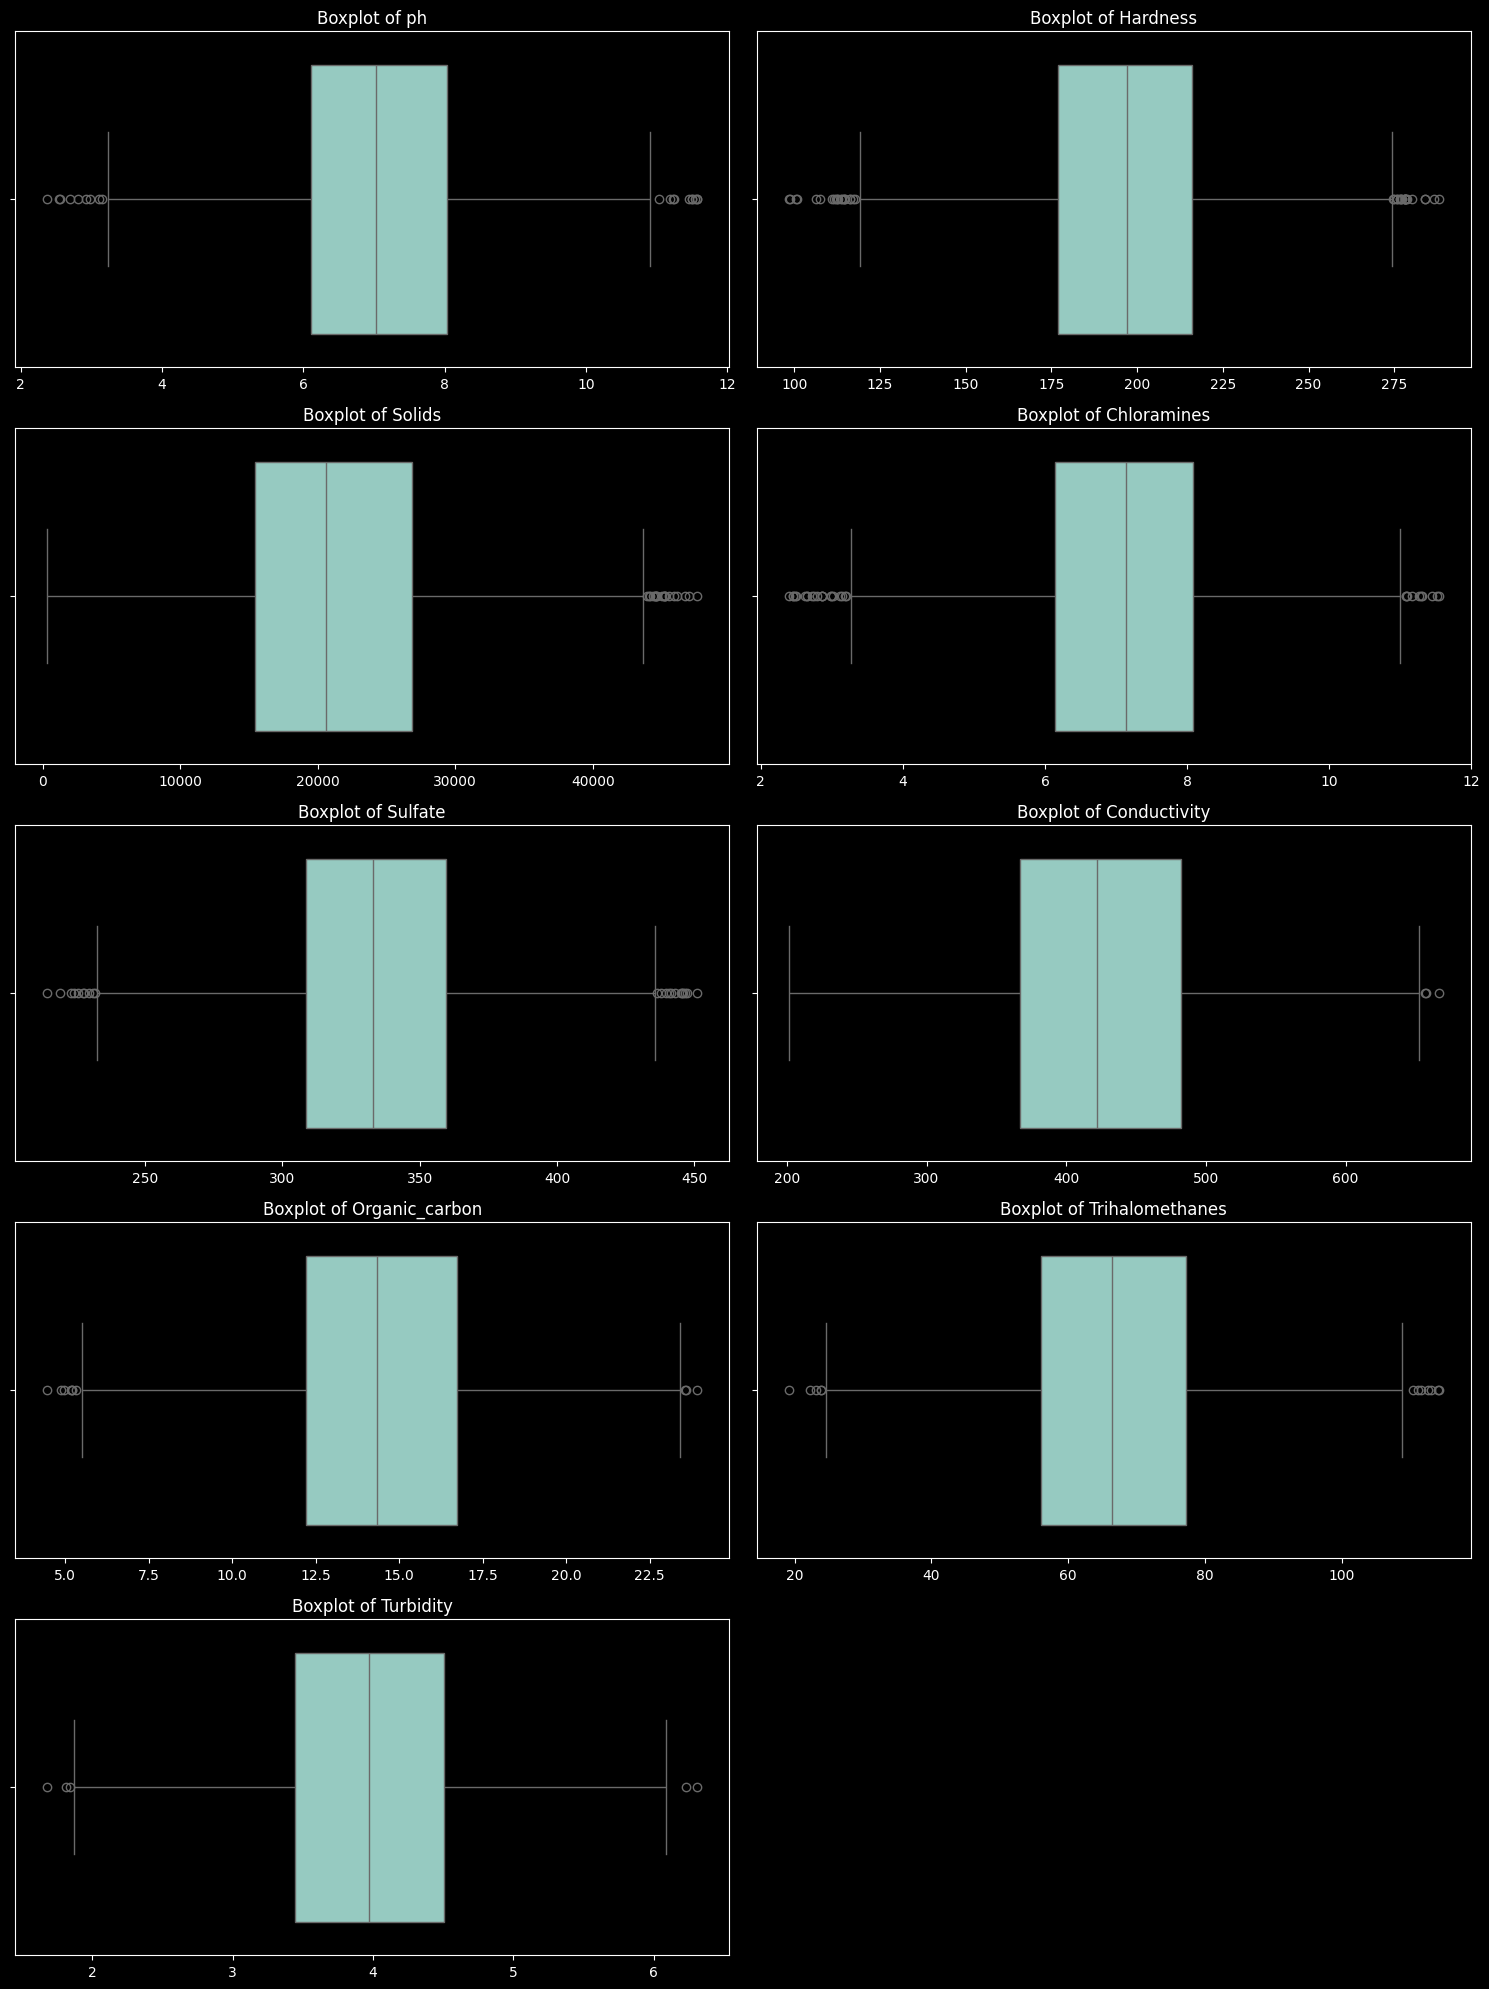

In [818]:
features = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## **2. Data Preprocessing**

### **2.1 Handle any missing values**

In [744]:
# df.fillna(df.median(), inplace=True)
# df.isnull().sum()

In [745]:
# The shape of the dataset before removing missing values
print("Shape of original dataset:", df.shape)
# Drop rows with any missing values
df.dropna(inplace=True)
# The shape of the dataset after removing missing values
print("Shape of dataset after removing missing values:", df.shape)

Shape of original dataset: (3276, 10)
Shape of dataset after removing missing values: (2011, 10)


### **2.2 Remove Duplicate Variables**

In [746]:
# The shape of the dataset before removing duplicates
print("Shape of original dataset:", df.shape)
# Remove duplicate rows
df = df.drop_duplicates()
# The shape of the dataset after removing duplicates
print("Shape of dataset after removing duplicates:", df.shape)

Shape of original dataset: (2011, 10)
Shape of dataset after removing duplicates: (2011, 10)


### **2.3 Encode categorical variables**

In [747]:
# There are no Categorical Variables

### **2.4 Removing Outliers**
To remove outliers we will perform the following steps:
1. Calculate Z- Scores for Features Set.
2. The sign(+, -) of the Z- Score is not important for our calculation. Therefore we will find the absolute value of each Z- Score.
3. We will find the max Z- Score for each row, so we will end up with a single column of Z- Scores containing only the max Z- Score.
4. We will add this column to our dataset.
5. We will remove any rows with a max Z- Score higher than the threshold.

In [748]:
from scipy import stats

In [749]:
print("Shape of original dataset:", df.shape)

# Setting the threshold value
threshold = 3
# Seperating feature columns
features = df.drop(columns = ['Potability'])
# Calculating Z-Score for each value
z_scores = stats.zscore(features)
# Finding the absolute value of each Z- Score
z_scores = z_scores.abs()
# Finding the max Z- Score of each row
z_scores = z_scores.max(axis=1)
# Adding the max Z- Score column to the DataFrame
df['max_z_score'] = z_scores
# Removing Outliers
df = df[df['max_z_score'] < 3]
# Dropping the 'max_z_score' column
df = df.drop(columns = ['max_z_score'])

print("Shape of dataset after removing outliers:", df.shape)

Shape of original dataset: (2011, 10)
Shape of dataset after removing outliers: (1929, 10)


## **3. Feature Engineering**

### **3.1 Target-Feature Split**

In [750]:
X = df.drop(columns = ['Potability'])
y = df['Potability']
X.sample(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1126,5.422446,205.266080,18542.957451,5.491963,306.702227,382.080129,10.504023,67.493450,2.911751
311,7.296038,235.735193,36043.706638,5.196213,377.190666,385.614321,17.052713,89.623551,4.168526
3021,10.337671,163.276225,21820.295875,7.899521,356.179637,561.206238,14.116324,56.193061,5.063109
696,9.545271,212.046391,25189.830622,6.203869,316.567319,498.266959,20.051519,52.901127,4.983903
376,10.272444,163.624623,18894.852394,10.068205,269.646656,446.450725,11.856914,82.445503,3.179885


In [751]:
y.sample(5)

1201    1
3264    1
460     0
1364    0
463     0
Name: Potability, dtype: int64

### **3.2 Balancing Imbalanced Datasets using SMOTE Oversampling**
* We will be using the Synthetic Minority Over-sampling Technique (SMOTE).
* SMOTE generates synthetic samples for the minority class by interpolating between existing samples.

In [752]:
from imblearn.over_sampling import SMOTE

<Axes: title={'center': 'Oversampled Dataset'}, xlabel='Potability'>

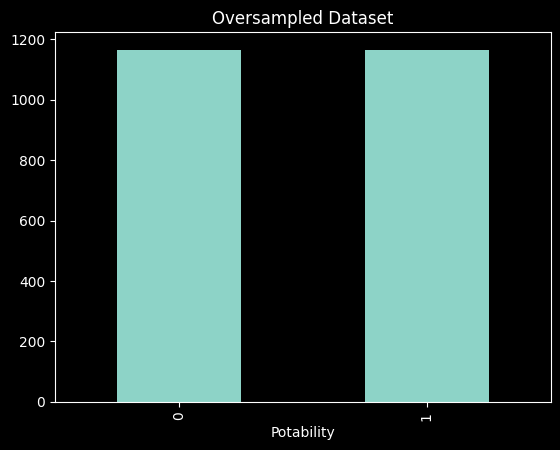

In [753]:
smote = SMOTE()
X, y = smote.fit_resample(X, y)
y.value_counts().plot(title = 'Oversampled Dataset', kind = 'bar')

### **3.3 Train-Test Split**

In [754]:
from sklearn.model_selection import train_test_split

In [755]:
# 80% of the Dataset will be used to train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.sample(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1988,6.716973,200.168360,37028.974723,4.995469,281.693689,386.337005,12.569486,59.580114,2.924651
1270,7.904053,217.771631,23575.991430,7.493024,279.146683,548.155383,10.329558,65.180543,3.137280
1049,7.703357,211.344687,12861.946542,9.245306,347.630834,598.662877,10.542342,91.118698,4.732125
1130,7.463916,215.479068,27150.395400,7.782915,382.958737,403.703502,14.777092,56.956939,5.075844
1097,6.136907,151.784319,20561.694731,8.487856,384.156079,363.618492,13.713703,96.582865,4.704585


### **3.4 Feature Scaling**
We will use Standardization

In [756]:
from sklearn.preprocessing import StandardScaler

In [757]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) #This returns a numpy array without column names
X_train = pd.DataFrame(X_train, columns = cols) #Change the numpy array back into a Pandas Dataframe and add back the column names

scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test, columns = cols)

X_train.sample(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1382,-0.340052,0.030774,-0.486762,-1.759396,-1.095695,-2.172017,-1.418916,0.472246,0.823011
487,0.857029,1.594172,-1.642567,1.146020,1.040422,-0.970838,-0.072899,1.196910,0.594626
1212,-0.044058,1.696859,0.520717,0.435026,0.053970,-0.267970,-1.084540,0.576639,0.895390
873,1.094077,-2.579968,0.209388,1.064536,-0.002294,-1.339672,0.690106,-0.901615,-1.459161
1108,-2.027400,1.848230,2.242443,0.422129,-1.733168,0.098622,1.514178,-0.334099,-1.098728


## **4. Model Selection**
We will use Cross Validation to determine the 3 most suitable models out of the following:
* Decision Trees
* Random Forests
* Support Vector Machines (SVM)
* k-Nearest Neighbors (k-NN)
* Naïve Bayes

In [758]:
from sklearn.model_selection import cross_val_score

### **4.1 Decision Trees**

In [759]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
# Our dataset will split into 5 portions
cross_val_score(model, X_train, y_train, cv = 5).mean()

0.6105076537230822

### **4.2 Random Forests**

In [760]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
cross_val_score(model, X_train, y_train, cv = 5).mean()

0.6840107815157543

### **4.3 Support Vector Machines**


In [761]:
from sklearn.svm import SVC
model = SVC()
cross_val_score(model, X_train, y_train, cv = 5).mean()

0.6684381215947419

### **4.4 k-Nearest Neighbors (k-NN)**

In [762]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
cross_val_score(model, X_train, y_train, cv = 5).mean()

0.648067110611433

### **4.5 Naïve Bayes**

In [763]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
cross_val_score(model, X_train, y_train, cv = 5).mean()

0.5579405575254404

The 3 most accurate models are:
1. Random Forests
2. Support Vector Machines
3. k-Nearest Neighbors (k-NN)

## **5. Model Training and Evaluation**

In [764]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### **5.1 Random Forests**

In [765]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred[:10]

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int64)

In [766]:
print(y_test[:10])

555     0
1420    1
1656    1
650     1
1442    1
1960    1
1607    1
2031    1
1132    1
2037    1
Name: Potability, dtype: int64


In [767]:
accuracy_score(y_test, pred)

0.7103004291845494

In [768]:
report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.69      0.75      0.72       227
           1       0.74      0.67      0.70       239

    accuracy                           0.71       466
   macro avg       0.71      0.71      0.71       466
weighted avg       0.71      0.71      0.71       466



### **5.2 Support Vector Machines**

In [769]:
model = SVC()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(pred[0:10])

[1 1 1 0 1 1 1 1 0 1]


In [770]:
print(y_test[0:10].values)

[0 1 1 1 1 1 1 1 1 1]


In [771]:
accuracy_score(y_test, pred)

0.7017167381974249

In [772]:
report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.68      0.74      0.71       227
           1       0.73      0.66      0.69       239

    accuracy                           0.70       466
   macro avg       0.70      0.70      0.70       466
weighted avg       0.70      0.70      0.70       466



### **5.3 k-Nearest Neighbors (k-NN)**

In [773]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(pred[0:10])

[0 0 1 0 0 1 1 1 0 1]


In [774]:
print(y_test[0:10].values)

[0 1 1 1 1 1 1 1 1 1]


In [775]:
accuracy_score(y_test, pred)

0.6738197424892703

In [776]:
report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.68      0.62      0.65       227
           1       0.67      0.72      0.69       239

    accuracy                           0.67       466
   macro avg       0.67      0.67      0.67       466
weighted avg       0.67      0.67      0.67       466



## **6. Hyperparameter Tuning**

In [835]:
from sklearn.model_selection import GridSearchCV

### **6.1 Random Forests**

In [836]:
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 150],
    # 'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    # 'max_features': ['sqrt', 'log2', None],
    # 'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator = model, param_grid = param_grid)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'max_depth': None, 'n_estimators': 150}

In [837]:
grid_search.score(X_test, y_test)

0.7188841201716738

In [842]:
model = RandomForestClassifier(
    n_estimators = 150,
    max_depth = None
)
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred[:10]

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [843]:
print(y_test[:10])

555     0
1420    1
1656    1
650     1
1442    1
1960    1
1607    1
2031    1
1132    1
2037    1
Name: Potability, dtype: int64


In [844]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)
accuracy

0.7145922746781116

In [845]:
from sklearn.metrics import classification_report
report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.69      0.74      0.72       227
           1       0.74      0.69      0.71       239

    accuracy                           0.71       466
   macro avg       0.72      0.72      0.71       466
weighted avg       0.72      0.71      0.71       466



### **6.2 Support Vector Machines**

In [893]:
model = SVC()
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],
    'coef0': [0.0, 0.1, 0.5, 1.0],
}
grid_search = GridSearchCV(estimator = model, param_grid = param_grid)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'C': 1, 'coef0': 0.1, 'degree': 4, 'gamma': 'auto', 'kernel': 'poly'}

In [894]:
grid_search.score(X_test, y_test)

0.703862660944206

In [899]:
model = SVC(
    C = 1,
    kernel = 'poly',
    gamma = 'auto',
    degree = 4,
    coef0 = 0.1
)
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred[:10]

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [900]:
print(y_test[:10])

555     0
1420    1
1656    1
650     1
1442    1
1960    1
1607    1
2031    1
1132    1
2037    1
Name: Potability, dtype: int64


In [901]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)
accuracy

0.703862660944206

In [851]:
from sklearn.metrics import classification_report
report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.68      0.68      0.68       227
           1       0.70      0.70      0.70       239

    accuracy                           0.69       466
   macro avg       0.69      0.69      0.69       466
weighted avg       0.69      0.69      0.69       466



### **6.3 k-Nearest Neighbors (k-NN)**

In [840]:
model = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    # 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    # 'leaf_size': [20, 30, 40],
    # 'p': [1, 2]
}
grid_search = GridSearchCV(estimator = model, param_grid = param_grid)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

In [841]:
grid_search.score(X_test, y_test)

0.6824034334763949

In [895]:
model = KNeighborsClassifier(
    n_neighbors = 5,
    weights = 'distance'
)
model.fit(X_train, y_train)
pred = model.predict(X_test)
pred[:10]

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 1], dtype=int64)

In [896]:
print(y_test[:10])

555     0
1420    1
1656    1
650     1
1442    1
1960    1
1607    1
2031    1
1132    1
2037    1
Name: Potability, dtype: int64


In [897]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, pred)
accuracy

0.6824034334763949

In [898]:
from sklearn.metrics import classification_report
report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.69      0.62      0.66       227
           1       0.67      0.74      0.71       239

    accuracy                           0.68       466
   macro avg       0.68      0.68      0.68       466
weighted avg       0.68      0.68      0.68       466



## **7. Model Evaluation**

Among the three models evaluated, **Random Forest** demonstrated the highest accuracy and
overall performance based on the classification report metrics.

It had the best accuracy and the best F1-Score.